# Finding K nearest neighbours with numpy

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
rand = np.random.RandomState()

In [3]:
X = rand.rand(10,2)

In [4]:
X

array([[ 0.41867685,  0.45929057],
       [ 0.38829178,  0.27894163],
       [ 0.19253879,  0.78982122],
       [ 0.34997908,  0.61071107],
       [ 0.06619788,  0.78080595],
       [ 0.54157655,  0.35381127],
       [ 0.09124421,  0.09759468],
       [ 0.46885595,  0.0046501 ],
       [ 0.49733318,  0.39886158],
       [ 0.44668742,  0.61381489]])

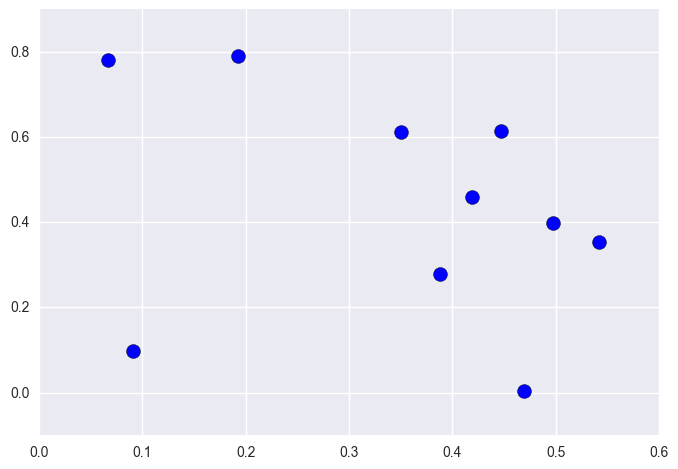

In [5]:
plt.scatter(X[:,0], X[:,1], s=100);

In [6]:
#find squared euclidean distances for every permutation. Calculated by (difference in x)^2 + (difference in y)^2
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=2)

In [7]:
(X[:, np.newaxis, :]).shape

(10, 1, 2)

In [8]:
(X[np.newaxis, :, :]).shape

(1, 10, 2)

When the above is calculated, both matricies are broadcast to create dimensions of 10,10,2. When the three dimensional matrix is summed across axis 2, it adds all the x and y pairs together to leave a 10 x 10 x 1 matrix, (which has the same number of values as 10 x 10). Each row in the final matrix represents the distances from a set of the X,Y coordinates to all the other coordinates, including itself which is why the matrix is 10x10.

In [9]:
dist_sq.shape

(10, 10)

In [10]:
dist_sq

array([[ 0.        ,  0.03344899,  0.16038894,  0.02764755,  0.22761357,
         0.02623022,  0.23803605,  0.20921589,  0.00983848,  0.02466236],
       [ 0.03344899,  0.        ,  0.29931719,  0.11153883,  0.35561228,
         0.02910169,  0.12112397,  0.08172643,  0.02627082,  0.11555015],
       [ 0.16038894,  0.29931719,  0.        ,  0.05686789,  0.0160433 ,
         0.31193203,  0.48943818,  0.69284485,  0.24574906,  0.09556975],
       [ 0.02764755,  0.11153883,  0.05686789,  0.        ,  0.10946404,
         0.1027071 ,  0.33023217,  0.38144161,  0.06659344,  0.00936214],
       [ 0.22761357,  0.35561228,  0.0160433 ,  0.10946404,  0.        ,
         0.40830934,  0.46740496,  0.76455142,  0.33175915,  0.17265831],
       [ 0.02623022,  0.02910169,  0.31193203,  0.1027071 ,  0.40830934,
         0.        ,  0.26844616,  0.12720181,  0.00398701,  0.07660583],
       [ 0.23803605,  0.12112397,  0.48943818,  0.33023217,  0.46740496,
         0.26844616,  0.        ,  0.15122932

In [11]:
nearest = np.argsort(dist_sq, axis=1)

In [12]:
"""find the indexes of the shortest distances from each point. 
Notice the first element of each row - (the shortest distance from each point is itself)
"""
nearest

array([[0, 8, 9, 5, 3, 1, 2, 7, 4, 6],
       [1, 8, 5, 0, 7, 3, 9, 6, 2, 4],
       [2, 4, 3, 9, 0, 8, 1, 5, 6, 7],
       [3, 9, 0, 2, 8, 5, 4, 1, 6, 7],
       [4, 2, 3, 9, 0, 8, 1, 5, 6, 7],
       [5, 8, 0, 1, 9, 3, 7, 6, 2, 4],
       [6, 1, 7, 0, 8, 5, 3, 9, 4, 2],
       [7, 1, 5, 6, 8, 0, 9, 3, 2, 4],
       [8, 5, 0, 1, 9, 3, 7, 2, 6, 4],
       [9, 3, 0, 8, 5, 2, 1, 4, 7, 6]], dtype=int64)

In [13]:
K = 2

In [14]:
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

In [15]:
# 3 nearest neighbours on the left (one of them is itself which is why K+1 is passed as an arguement above.)
nearest_partition

array([[8, 0, 9, 5, 3, 1, 2, 7, 4, 6],
       [1, 8, 5, 0, 7, 3, 9, 6, 2, 4],
       [3, 4, 2, 9, 1, 5, 6, 7, 8, 0],
       [3, 9, 0, 2, 8, 5, 4, 7, 1, 6],
       [3, 4, 2, 9, 1, 5, 6, 7, 8, 0],
       [8, 5, 0, 1, 9, 3, 6, 7, 2, 4],
       [1, 6, 7, 0, 8, 5, 3, 9, 2, 4],
       [7, 5, 1, 6, 0, 8, 9, 3, 2, 4],
       [8, 5, 0, 1, 9, 3, 6, 7, 2, 4],
       [3, 9, 0, 8, 5, 2, 1, 4, 7, 6]], dtype=int64)

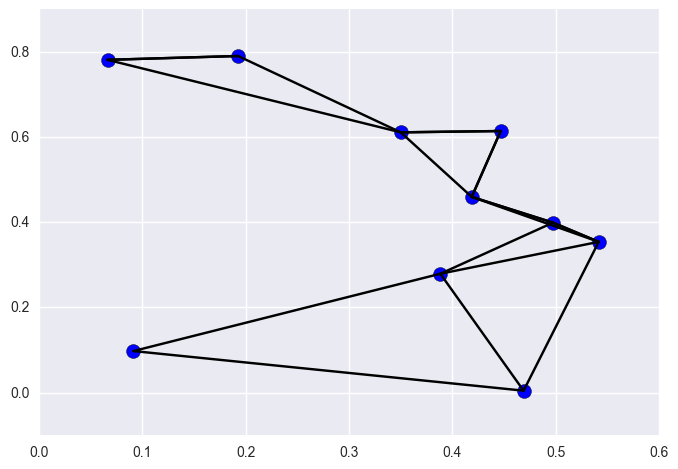

In [16]:
plt.scatter(X[:, 0], X[:,1], s=100)

#use arguement unpacking to plot the paths to the K nearest neighbours
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]),color='black')